# Vizualização de dados da PNAD
Pesquisa Nacional por Amostra de Domicílios - PNAD

Arquivo com dados: https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true

Link do vídeo que me ajudou: https://www.youtube.com/watch?v=2OXbbgvMrBA&list=WL&index=14&t=183s

    
    Essa é uma continuação da Análise Exploratória desses mesmos dados. 
    Você não precisa vê-la se seu interesse é apenas a aplicação das 
    bibliotecas gráficas. Mas caso queria, aqui está o link para o notebook: 


https://github.com/pauloreis-ds/Paulo-Reis-Ciencia-de-dados/tree/master/2%20-%20Processamento%20de%20dados%20(Limpeza%20e%20An%C3%A1lise)%20-%20Data%20Processing%20(Wrangling%20-%20Cleaning%20-%20Analysis)/PNAD


    ~(*-*~) ~(*-*)~ (~*-*)~
    Neste notebook, utilizaremos o poder da visualização para fazermos
    algumas análises, além da própria prática e aprendizagem de como
    utilizar uma das ferramentas gráficas disponibilizadas para 
    esse belo trabalho Data Scientifico
    ~(*-*~) ~(*-*)~ (~*-*)~    
    

## Planejamento 

    1 - Brevissíma introdução aos dados
    2 - Gráficos
        2.1 Idade e Renda
        2.2 Sexo
        2.3 Cor da pele
        2.4 Cruzando dados - Cor de pele x Sexo
        2.5 Média de Renda por Sexo
            Média de Renda por Cor da pele
        2.6 Desafios da Renda (Voltando ao 1º gráfico)
            Agregando os dados
                Interação entre idade e renda
    3 - Modelos estatísticos
    4 - Anos de Escolaridade
        4.1 Diferença de escolaridade entre homens e mulheres

In [12]:
# Seção imports

# manipulação de dados
import pandas as pd

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para análise estatística (usaremos na parte 3 do planejamento)
import statsmodels.formula.api as smf

# Regular Expressions Para limpar ['Anos_de_escolaridade']
import re

    Obs: o seaborn foi desenvolvido em cima do matplotlib, por isso podemos usá-los juntos
    sem nenhuma problemática de interação. Então mesmo utilizando métodos do seaborn para
    construir os gráficos (por serem mais fáceis de usar), ainda conseguimos aplicar funções
    do matplotlib a eles.

In [13]:
# Recebendo dados na memória

pnad = pd.read_csv('pes_2012_PARTE2.csv')

## Brevissíma introdução aos dados

In [14]:
pnad.head()

,Unnamed: 0,Ano,UF,Sexo,Idade,Cor_da_pele,Anos_de_escolaridade,Renda_principal,Renda_total,Peso_amostral
0,0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
4,4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460.0,232


In [15]:
# Breve descrição dos dados, para você se situar
'''
    Há valores nulos (lidaremos com eles, caso seja necessário)
    e uma coluna desnecessária.    
'''

pnad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362451 entries, 0 to 362450
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            362451 non-null  int64  
 1   Ano                   362451 non-null  int64  
 2   UF                    362451 non-null  object 
 3   Sexo                  362451 non-null  object 
 4   Idade                 362451 non-null  int64  
 5   Cor_da_pele           362451 non-null  object 
 6   Anos_de_escolaridade  362451 non-null  object 
 7   Renda_principal       168981 non-null  float64
 8   Renda_total           303634 non-null  float64
 9   Peso_amostral         362451 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 27.7+ MB


In [16]:
# Removendo a coluna desnecessária, já que ela é um índice que já temos
pnad.drop(columns='Unnamed: 0', inplace=True)
pnad.head(1)

,Ano,UF,Sexo,Idade,Cor_da_pele,Anos_de_escolaridade,Renda_principal,Renda_total,Peso_amostral
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232


## 2 - Gráficos
### 2.1 - Idade e renda

In [17]:
# Definindo um estilo para os gráficos ficarem mais bonitos

sns.set(style='whitegrid')

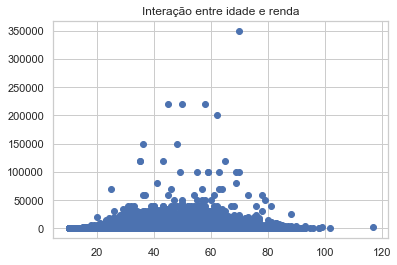

In [18]:
'''
    Criando um gráfico de dispersão. Ele precisa de 2 parâmetros: o eixo X e o eixo Y. 
   
       Y  (Vertical)
       |
       |
       |_______ X  (horizontal)

'''

plt.scatter(x = pnad.Idade, y = pnad.Renda_principal)

# Adiciona o título ao gráfico
plt.title('Interação entre idade e renda')

# "Plotando" o gráfico
plt.show()

    Olhando rapidamente para .describe() [célula abaixo], podemos perceber que
    nosso gráfico está cheio de 'sujeiras'/outliers, em outras palavras, valores 
    atípicos. Isso porque queremos analisar o comportamento ou o histórico ou os 
    dados da maior quantidade de (por exemplo) cliente possível, para saber como 
    reagir a essa maioria. 
    
    Estudar as exceções (nesse caso) não é o que queremos. 
    A média da renda principal é 1342. E a mediana(50%) nos mostra que metade das pessoas
    ganhavam até 800. Por isso a parte inferior do gráfico é tão densa.
    
    Porém, entretanto, todavia... até 75% das pessoas ganhavam 1400. Mas claramente,
    ao olharmos para a '75ª' parte do gráfico, não vemos um valor de 1400 no eixo Y
       
                Y
                |
    75% - 240mil|
                |
    50% - 170mil|
                |
    0%          |___________________
    
    
    OU SEJA, algumas poucas pessoas que têm rendimentos Muito altos atrapalham 
    na visualização dos casos mais 'reais', que são mais prováveis de se acontecer.    

In [19]:
pnad.describe()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
count,362451.0,362451.000000,168981.000000,303634.000000,362451.000000
mean,2012.0,32.638012,1342.847628,992.282985,543.183294
std,0.0,20.770326,2656.679175,2492.988418,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,0.000000,334.000000
50%,2012.0,30.000000,800.000000,622.000000,522.000000
75%,2012.0,48.000000,1400.000000,1100.000000,705.000000
max,2012.0,117.000000,350000.000000,351600.000000,1132.000000


    Antes de solucionarmos essa problemática um pouco mais complexa,
    vamos compreender alguns pontos mais simples (inclusive da sintax
    das bibliotecas)
### 2.2 Sexo

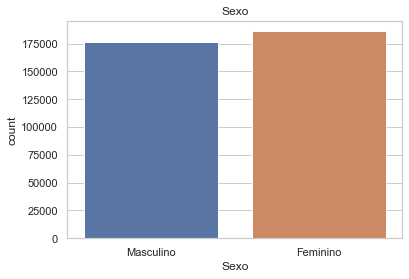

In [20]:
# Um histograma que mostra a quantidade de homens e mulheres

sns.countplot(pnad.Sexo)
plt.title('Sexo')
plt.show()

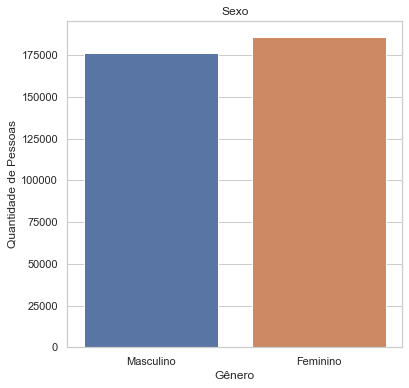

In [22]:
'''
    Para deixá-lo mais informativo, podemos mudar o nome dos eixos
    com as funções xlabel() e ylabel() --> label = rótulo, etiqueta.
    E alterar a dimensão da figura com  plt.figure(figsize=()) no 
    início do código do gráfico.

'''

plt.figure(figsize=(6,6))    # novo

sns.countplot(pnad.Sexo)

plt.title('Sexo')
plt.xlabel('Gênero')    # novo
plt.ylabel('Quantidade de Pessoas')    # novo

plt.show()

### 2.3 Cor da pele
    Como temos mais categorias de classificação, o histograma
    parece ser um pouco "melhor utilizado"/ mais atraente. Apenas 
    uma impressão minha, já que, na verdade, o uso dos tipos de 
    gráficos em relação aos tipos de dados varia de acordo com 
    o que mais se adequa à situação.

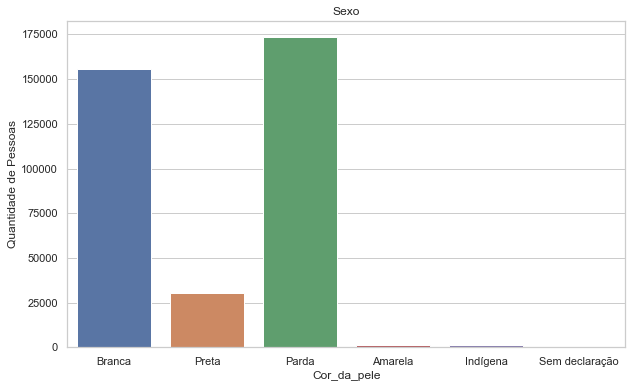

In [23]:
plt.figure(figsize=(10,6))    
sns.countplot(pnad.Cor_da_pele)

plt.title('Sexo')
# plt.xlabel('Cor da pele')    # Perceba que sem o 'label' o nome da coluna é utilizado.
plt.ylabel('Quantidade de Pessoas')

plt.show()

### 2.4 Cruzando dados - Cor de pele x Sexo
    Podemos também cruzar os dois gráficos para formar 1
    com informações sobre as duas observações.

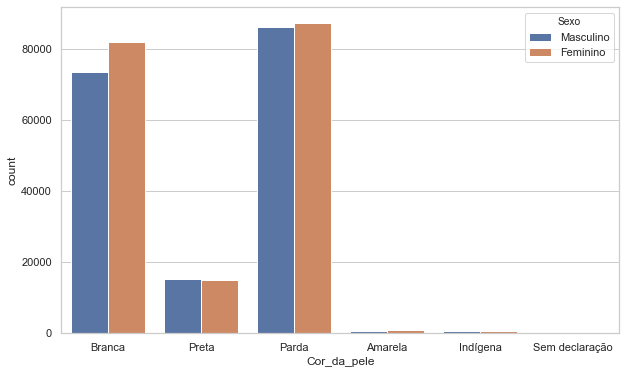

In [24]:
'''
    Nesse caso, queremos que o eixo Y (vertical) seja a quantidade de pessoas.
        Logo, não adicionamos parâmetro y, pois ele já está utilizando a 
        quantidade de pessoas.
    
    No eixo x, queremos manter a cor de pele como a classe separadora
    Mas queremos que em cada categoria de pele, haja uma subdivisão entre
    os sexos.
        Assim sendo, assinamos o parâmetro 'hue' como sendo a coluna/as categorias
        da subdivisão (Sexo).
    
    ps: o parâmetro hue determina qual coluna no quadro de dados deve ser usada 
    para codificação de cores.
'''
plt.figure(figsize=(10,6))    

sns.countplot(pnad.Cor_da_pele, hue=pnad.Sexo)

plt.show()

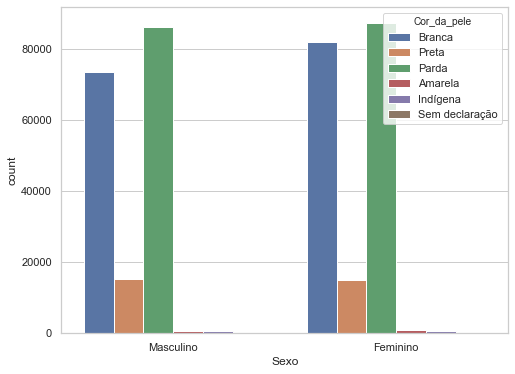

In [25]:
# Veja o que ocorre ao invertermos o eixo x com o hue
plt.figure(figsize=(8,6))    

sns.countplot(pnad.Sexo, hue=pnad.Cor_da_pele)

plt.show()

### 2.5 Média de Renda por Sexo
    Horror à primeira vista. Como você vê, os outliers (pontos fora da curva)
    atrapalham e muito na visão e até interpretação do boxplot. Já que eles
    têm uma renda imensamente maior que a maioria das pessoas.
    _____
      |
     _|_
    |   |
    |   |
    |___|
      |
    __|__

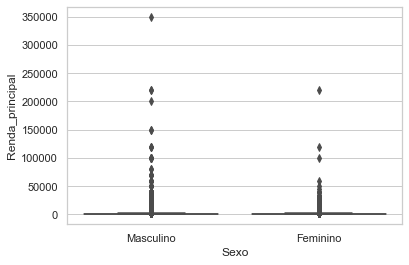

In [26]:
# Tente apreciar

sns.boxplot(pnad.Sexo, pnad.Renda_principal)
plt.show()

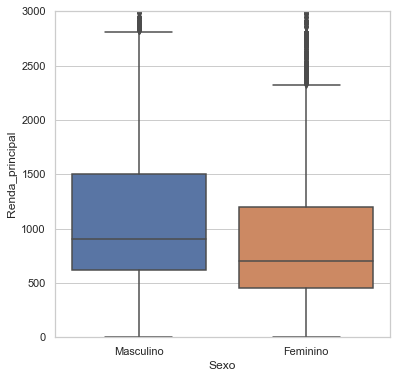

In [27]:
'''
    Para tentar contornar isso, podemos definir limites no eixo Y
    com plt.ylim()   y limit (minimo, máximo)
    Se antes a renda variava de 0 a 350mil
    Façamos a ir de 0 a 3 mil
    
    Podemos perceber os homens estão com uma média salárial maior que as mulheres
'''
plt.figure(figsize=(6,6))    

sns.boxplot(pnad.Sexo, pnad.Renda_principal)
plt.ylim(0,3000)    # novo
plt.show()

####  Média de Renda por Cor da pele 

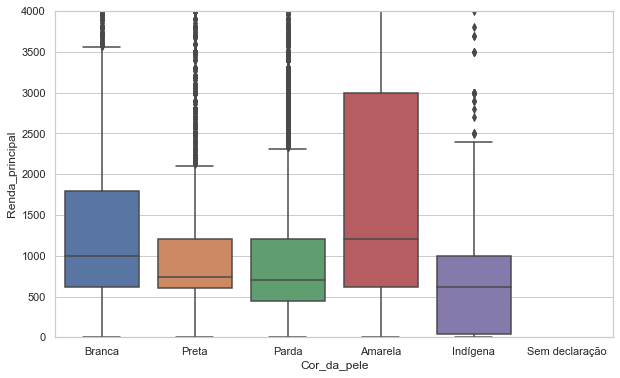

In [28]:
'''
    Os 'amarelos' têm a distribuição de renda mais alta,
    seguida dos 'brancos' e os indígenas tendo a menor média
    salarial.
'''
plt.figure(figsize=(10,6))    

sns.boxplot(pnad.Cor_da_pele, pnad.Renda_principal)    #Alteração
plt.ylim(0,4000)    # Alteração
plt.show()

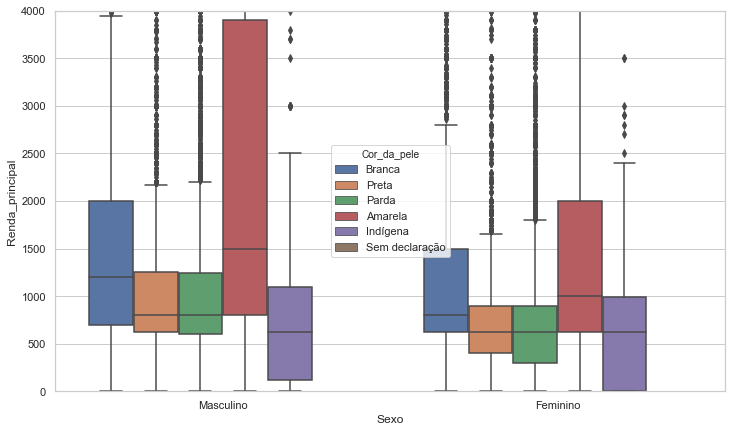

In [29]:
'''
        Agora, vamos colocar no eixo _X_ (horizontal) a divisão por Sexo.
        No eixo |Y| (vertical) queremos o valor do salário principal.
        E na subdivisão, vamos utilizar a cor da pele
        
        sns.boxplot( X, Y, hue)
        
        Confirmaremos ainda mais que os homens estão com uma dispersão 
        salarial, além da média, maior que as mulheres.
        
'''

# Aumentanto o tamanho da figura
plt.figure(figsize=(12,7))

sns.boxplot(pnad.Sexo, pnad.Renda_principal, hue=pnad.Cor_da_pele)    #Alteração
plt.ylim(0,4000)    # Alteração
plt.show()

### 2.6 Desafios da Renda (Voltando ao 1º gráfico)
        Abaixo vemos que idade vai de 0 (mínima) a 117 (máxima) anos. 
        Porém, não faz sentido avaliar o salário de um bebê ou de uma
        criança de 12 anos. Por isso, o ideal é selecionarmos um range
        com o qual trablhar.
        


In [30]:
pnad.describe()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
count,362451.0,362451.000000,168981.000000,303634.000000,362451.000000
mean,2012.0,32.638012,1342.847628,992.282985,543.183294
std,0.0,20.770326,2656.679175,2492.988418,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,0.000000,334.000000
50%,2012.0,30.000000,800.000000,622.000000,522.000000
75%,2012.0,48.000000,1400.000000,1100.000000,705.000000
max,2012.0,117.000000,350000.000000,351600.000000,1132.000000


In [31]:
# Então vamos extrair uma subamostra de pessoas entre 18 e 80 anos
'''
    Com o .loc[] conseguiremos condicionar e escolher os dados que queremos
    
    Senhor .loc,  me dê as pessoas que são de idade
    
    [ (maior ou igual a 18 anos) e (menor ou igual a 80) ]
    
'''

idade_de_18_a_80 = pnad.loc[(pnad.Idade >= 18) & (pnad.Idade <=80)]
idade_de_18_a_80.shape

(253553, 9)

In [32]:
'''
    A descrição mudou um pouco, mas ainda há alguns fatores para minerarmos.
    Não há um motivo específico para analisarmos pessoas com renda igual a 0.
        Então, por hora, vamos removê-las desta análise.
''' 

idade_de_18_a_80.describe()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
count,253553.0,253553.000000,162489.000000,247915.000000,253553.000000
mean,2012.0,41.243267,1383.663325,1179.231043,546.483579
std,0.0,15.734264,2697.002431,2702.889707,262.830921
min,2012.0,18.000000,0.000000,0.000000,174.000000
25%,2012.0,28.000000,622.000000,216.000000,334.000000
50%,2012.0,39.000000,800.000000,675.000000,523.000000
75%,2012.0,53.000000,1500.000000,1244.000000,705.000000
max,2012.0,80.000000,350000.000000,351600.000000,1132.000000


In [33]:
idade_de_18_a_80 = pnad.loc[(pnad.Idade >= 18) & (pnad.Idade <=80) & (pnad.Renda_principal > 0)]
idade_de_18_a_80.shape

(152465, 9)

In [34]:
'''
    Perceba que considerando apenas as pessoas com renda, a média (mean)
    sobe, já que não há valores 0 sendo somados.
'''
idade_de_18_a_80.describe()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
count,152465.0,152465.000000,152465.000000,152045.000000,152465.000000
mean,2012.0,38.306818,1474.633982,1619.577362,543.260643
std,0.0,12.669668,2760.054778,3249.729116,265.643859
min,2012.0,18.000000,1.000000,1.000000,174.000000
25%,2012.0,28.000000,622.000000,622.000000,333.000000
50%,2012.0,37.000000,900.000000,950.000000,494.000000
75%,2012.0,47.000000,1500.000000,1600.000000,689.000000
max,2012.0,80.000000,350000.000000,351600.000000,1132.000000


#### Agregando os dados 
    .agg() nos permite usar uma ou mais operações no eixo especificado (linhas ou colunas).
    
    Para você entender melhor, olhe para o exemplo a seguir

In [35]:
# Criamos um DataFrame
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [36]:
# Agregamos e aplicamos as funções sum() que retorna a soma e min() retornando o valor mínimo
df.agg(['sum', 'min'])

,A,B,C
sum,12,15,18
min,1,2,3


In [37]:
'''
    Nos nossos dados, primeiro, vamos agrupá-los em sexo para então
    aplicarmos as funções com o .agg()
    
    Exemplo de agrupamento  .groupby()
'''

# Dados antes de agrupar
idade_de_18_a_80.head()

,Ano,UF,Sexo,Idade,Cor_da_pele,Anos_de_escolaridade,Renda_principal,Renda_total,Peso_amostral
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000.0,10000.0,232


In [38]:
# Agrupando por Cor da pele e usando a função de soma (poderia ser qualquer outra)
# Note que o ['Cor_da_pele'] virou o índice da tabela
idade_de_18_a_80.groupby('Cor_da_pele').sum()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
Cor_da_pele,,,,,
Amarela,1358100,27324,1995641.0,2105969.0,449148
Branca,136663088,2639068,128210497.0,141110805.0,39783056
Indígena,1008012,19592,585051.0,656499.0,217034
Parda,139272652,2612024,78602181.0,85637206.0,35095740
Preta,28457728,542441,15436700.0,16738161.0,7283256


In [39]:
# E finalmente, como queremos agrupar
idade_de_18_a_80.groupby('Sexo').sum()

,Ano,Idade,Renda_principal,Renda_total,Peso_amostral
Sexo,,,,,
Feminino,127727796,2402646,77520070.0,86766147.0,34386504
Masculino,179031784,3437803,147310000.0,159482493.0,48441730


In [40]:
'''
    Após agrupá-los em sexo, podemos aplicar as funções com o 
    .agg() nas colunas (ou linhas) que desjeamos utilizar.
'''
# Aplicando a média (sálarial)
idade_de_18_a_80.groupby('Sexo').agg({'Renda_principal':'mean'})

,Renda_principal
Sexo,
Feminino,1221.115417
Masculino,1655.503360


In [41]:
# Mesmo para cor da pele
idade_de_18_a_80.groupby('Cor_da_pele').agg({'Renda_principal':'mean'})

,Renda_principal
Cor_da_pele,
Amarela,2956.505185
Branca,1887.558109
Indígena,1167.766467
Parda,1135.525072
Preta,1091.395645


In [42]:
"""
    Podemos também agrupar por duas categorias (ou mais) passando uma 
    ['l','i','s','t','a'] delas e então aplicar o .agg() e utilizar 
    as funções estatísticas.
"""

idade_de_18_a_80.groupby(['Sexo','Cor_da_pele']).agg({'Renda_principal':'mean'})

Renda_principal
Sexo      Cor_da_pele                 
Feminino  Amarela          2258.087662
          Branca           1529.147839
          Indígena         1051.083333
          Parda             947.615567
          Preta             876.474815
Masculino Amarela          3542.643052
          Branca           2168.098501
          Indígena         1240.268608
          Parda            1259.249383
          Preta            1235.539334

#### Interação entre idade e renda

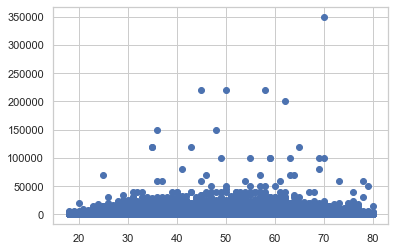

In [43]:
# Primeiro gráfico que fizemos, sabemos que é uma péssima representação 

plt.scatter(idade_de_18_a_80.Idade, idade_de_18_a_80.Renda_principal)
plt.show()

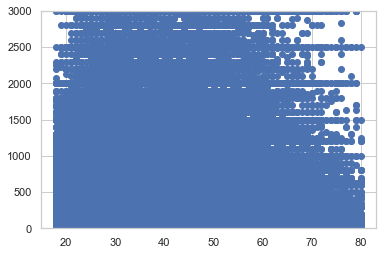

In [44]:
# Ao tentarmos limitar a renda, se torna uma visualização ainda mais agressiva 
# por conta da quantidade de pessoas

plt.scatter(idade_de_18_a_80.Idade, idade_de_18_a_80.Renda_principal)
plt.ylim(0, 3000)    # novo
plt.show()

In [45]:
'''
    Uma possível solução é calcularmos a média de renda por idade e
    a usarmos como parâmetro de análise, ao invés da renda de cada 
    idade/pessoa.
    
    Para isso, devemos agrupar os dados por idade e depois calcular a 
    média.
'''

dado = idade_de_18_a_80.groupby('Idade').agg({'Renda_principal':'mean'})
dado.head()

,Renda_principal
Idade,
18,636.022523
19,712.451517
20,781.159672
21,831.005974
22,881.850485


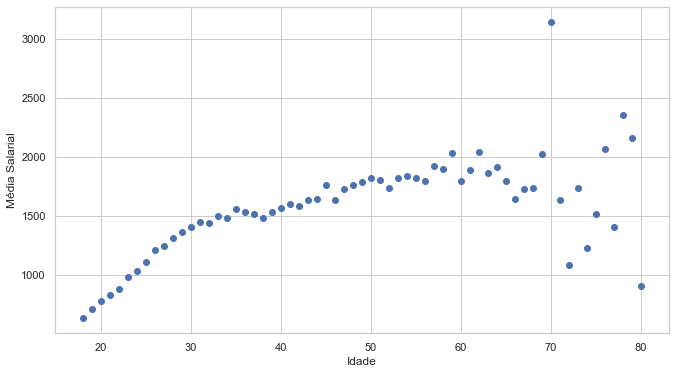

In [46]:
'''
    Agora que temos a renda média de cada idade podemos plotar o gráfico.

    Note que usei dado.index no eixo X, porque ao agrupar os dados a 
    coluna ['Idade'] foi transformada no índice(index) da nova tabela.
'''
plt.figure(figsize=(11,6))

plt.scatter(dado.index, dado.Renda_principal)

plt.xlabel('Idade')
plt.ylabel('Média Salarial')

plt.show()

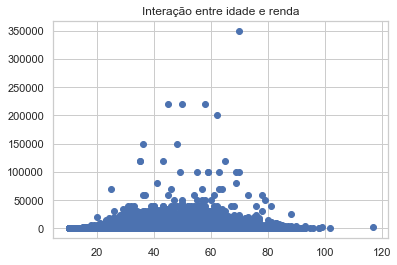

In [47]:
# Primeiro gráfico feito.
plt.scatter(x = pnad.Idade, y = pnad.Renda_principal)

plt.title('Interação entre idade e renda')

plt.show()

    Finalizando, podemos perceber a diferença de clareza entre os gráficos inicial
    e o final. Eles têm a mesma base ideológica (mostrar a relação entre a idade e
    a renda), porém nos apresentam tal relação de maneiras bem diferentes.
    Um nos mostra as médias das rendas (dentro de um limite de até 3000 'dinheiros') de 
    acordo com cada idade, enquanto o outro é literalmente um mapeamento salarial, onde 
    teoricamente conseguimos ver a renda de todas as pessoas da pesquisa.    

## 3 - Modelos estatísticos
        Para facilitar nossas operações, vamos resetar o index
        e tornar o index atual (Idade) em uma coluna.

In [53]:
dado.reset_index(inplace=True)
dado.head()

,level_0,index,Idade,Renda_principal
0,0,0,18,636.022523
1,1,1,19,712.451517
2,2,2,20,781.159672
3,3,3,21,831.005974
4,4,4,22,881.850485


In [56]:
# ordinarie list squares (ols) é a regressão linear da biblioteca statsmodels.formula.api
'''
    Não entraremos em detalhes agora, basicamente, utilizaremos essa regressão 
    linear no nosso gráfico. Por hora o mais importante é ver (literalmente rsrs)
    como as regressões se comportam no gráfico.
    
'''

modelo_linear = smf.ols(formula='Renda_principal ~ dado.Idade', data=dado).fit()
print(modelo_linear.summary())

                            OLS Regression Results                            
Dep. Variable:        Renda_principal   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     38.25
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           5.70e-08
Time:                        18:50:29   Log-Likelihood:                -454.06
No. Observations:                  63   AIC:                             912.1
Df Residuals:                      61   BIC:                             916.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    891.4949    120.141      7.420      0.0

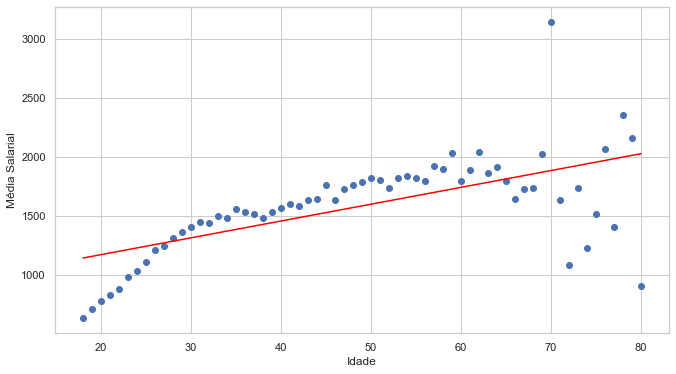

In [57]:
# Curva de regrassão
curva_de_regressao = modelo_linear.predict(dado.Idade)    # novo, mas não precisa entender agora


plt.figure(figsize=(11,6))
plt.scatter(dado.Idade, dado.Renda_principal)

# Criando o gráfico da linha da regressão 
# obs: ele será plotado junto ao gráfico Idade-Renda
plt.plot(dado.Idade, curva_de_regressao, c='red')    # novo

plt.xlabel('Idade')
plt.ylabel('Média Salarial')

plt.show()

    Seguinte: abordar esse gráfico de renda com a regressão linear não é o
    ideal a se fazer, porque nossas variáveis não têm uma relação linear.
    Elas se relacionam quadraticamente, por isso precisamos aplicar um
    modelo de regressão quadrática. Veja a seguir

In [58]:
modelo_linear_2 = smf.ols(formula='Renda_principal ~ dado.Idade + I(dado.Idade**2)', data=dado).fit()
print(modelo_linear_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Renda_principal   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     44.71
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.29e-12
Time:                        18:50:42   Log-Likelihood:                -440.65
No. Observations:                  63   AIC:                             887.3
Df Residuals:                      60   BIC:                             893.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -454.5368    257

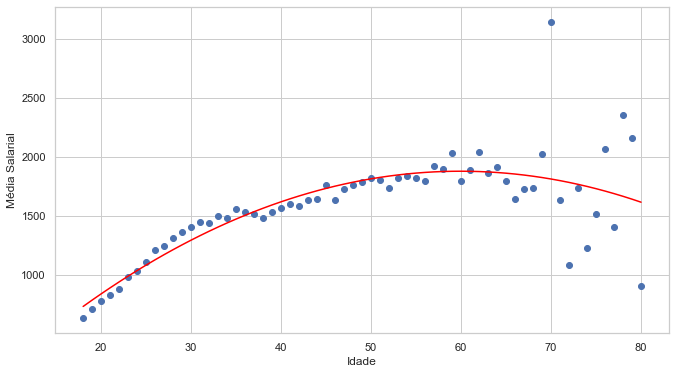

In [59]:
curva_de_regressao_2 = modelo_linear_2.predict(dado.Idade)

plt.figure(figsize=(11,6))
plt.scatter(dado.Idade, dado.Renda_principal)

plt.plot(dado.Idade, curva_de_regressao_2, c='red')    # novo

plt.xlabel('Idade')
plt.ylabel('Média Salarial')

plt.show()

    Agora conseguimos ver com mais clareza a relação quadrática entre
    as variáveis e conseguimos estimar mais assertivamente os possíveis
    valores modelados.

## Anos de Escolaridade
    Note que os valores da coluna ['Anos_de_escolaridade'] estão
    em formato de texto str (string), logo, não conseguiremos 
    fazer cálculos com os valores. Para isso devemos mudar o tipo
    de dado.

In [60]:
idade_de_18_a_80.Anos_de_escolaridade.unique()

array(['15 anos ou mais', '14 anos', '11 anos', '8 anos', '10 anos',
       '4 anos', '13 anos', '5 anos', '3 anos', '6 anos',
       'Não determinados ', '12 anos', 'Sem instrução e menos de 1 ano',
       '9 anos', '1 ano', '2 anos', '7 anos'], dtype=object)

In [61]:
idade_de_18_a_80.Anos_de_escolaridade.value_counts()

11 anos                           46554
15 anos ou mais                   19837
8 anos                            15547
4 anos                            11516
Sem instrução e menos de 1 ano     8951
5 anos                             8018
7 anos                             5497
10 anos                            5099
6 anos                             4874
12 anos                            4826
3 anos                             4718
9 anos                             4384
14 anos                            3512
13 anos                            3269
2 anos                             3234
1 ano                              2147
Não determinados                    482
Name: Anos_de_escolaridade, dtype: int64

In [62]:
'''
    Dependendo do objetivo de uso para os dados, há várias formas de
    se abordar esses dados. Aqui, iremos transformar 'Sem instrução e menos de 1 ano'
    em 0. E 'Não determinados' virarão NaN
    
    Como a coluna []'Anos_de_escolaridade'] está em formato str, é bom passarmos
    o 0 também no formato str '0'
'''

idade_de_18_a_80.loc[idade_de_18_a_80.Anos_de_escolaridade =='Sem instrução e menos de 1 ano', 'Anos_de_escolaridade'] = '0'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [76]:
'''
    Alterado. Perceba que há um padrão na escrita dos valores. E a biblioteca re
    regular expressions nos auxiliará a identificar esse padrão, para que possamos
    fazer as alterações que queremos sem muitas dificuldades.
    Queremos deixar apenas os 'números' (para depois transformá-los em números de
    verdade)
'''

idade_de_18_a_80.Anos_de_escolaridade.value_counts()

11 anos              46554
15 anos ou mais      19837
8 anos               15547
4 anos               11516
0                     8951
5 anos                8018
7 anos                5497
10 anos               5099
6 anos                4874
12 anos               4826
3 anos                4718
9 anos                4384
14 anos               3512
13 anos               3269
2 anos                3234
1 ano                 2147
Não determinados       482
Name: Anos_de_escolaridade, dtype: int64

In [69]:
# 1º Definimos os padrões

anos_ou_mais = re.compile(' anos ou mais')
anos = re.compile(' anos')
ano = re.compile(' ano')

In [78]:
# 2º Aplicar a substituição desses padrões
# .apply() executa uma função em todas as linhas da tabela
# lambda é apenas uma função sem nome (dá uma pesquisada, é bem simples)
'''
    Em cada linha da coluna ['Ano_de_escolaridade'] substitua o valor de ano_mais para '' (nada:)
    
    O mesmo para as outras expressões regulares.
    
    (.copy() por advertências do pandas, assunto para outro notebook)
'''
idade_de_18_a_80.Anos_de_escolaridade = idade_de_18_a_80.Anos_de_escolaridade.apply(lambda em_cada_linha: anos_ou_mais.sub('',em_cada_linha)).copy()
idade_de_18_a_80.Anos_de_escolaridade = idade_de_18_a_80.Anos_de_escolaridade.apply(lambda em_cada_linha: anos.sub('',em_cada_linha)).copy()
idade_de_18_a_80.Anos_de_escolaridade = idade_de_18_a_80.Anos_de_escolaridade.apply(lambda em_cada_linha: ano.sub('',em_cada_linha)).copy()

    Observação: a Ordem dos fatores altera o resultado ksks. Se, por exemplo, ordenassemos
    
    anos.sub()
    anos_mais.sub()
    
    A alteração seria feita dessa forma:
    
    a função anos.sub() é chamada:
       
    11 anos               11               
    15 anos ou mais       15 ou mais
    8 anos                8
    0                     0
    5 anos                5
    7 anos                7
    10 anos               10
    6 anos                6
    12 anos               12
    3 anos                3
    9 anos                9
    14 anos               14
    13 anos               13
    2 anos                2
    1 ano                 1 ano
    
    E agora, quando anos_mais.sub() for chamada não haverá 'anos ou mais' para alterar.
    Por isso devemos sempre alterar do mais particular para o mais geral
    'ano' é geral, praticamente todas as strings têm.
    'anos ou mais' é bem específica, apenas algumas strings a contém.

In [79]:
# \(*O*)/

idade_de_18_a_80.Anos_de_escolaridade.value_counts()

11                   46554
15                   19837
8                    15547
4                    11516
0                     8951
5                     8018
7                     5497
10                    5099
6                     4874
12                    4826
3                     4718
9                     4384
14                    3512
13                    3269
2                     3234
1                     2147
Não determinados       482
Name: Anos_de_escolaridade, dtype: int64

In [85]:
# Seu tipo ainda é object

idade_de_18_a_80.dtypes

Ano                       int64
UF                       object
Sexo                     object
Idade                     int64
Cor_da_pele              object
Anos_de_escolaridade     object
Renda_principal         float64
Renda_total             float64
Peso_amostral             int64
dtype: object

In [88]:
# 'Não determinados' será transformado em NaN

idade_de_18_a_80.Anos_de_escolaridade = pd.to_numeric(idade_de_18_a_80.Anos_de_escolaridade, errors='coerce')

idade_de_18_a_80.Anos_de_escolaridade.value_counts()

11.0    46554
15.0    19837
8.0     15547
4.0     11516
0.0      8951
5.0      8018
7.0      5497
10.0     5099
6.0      4874
12.0     4826
3.0      4718
9.0      4384
14.0     3512
13.0     3269
2.0      3234
1.0      2147
Name: Anos_de_escolaridade, dtype: int64

In [91]:
# Agora podemos fazer cálculos com essa coluna

idade_de_18_a_80.Anos_de_escolaridade.describe()

count    151983.000000
mean          8.887139
std           4.273326
min           0.000000
25%           5.000000
50%          11.000000
75%          11.000000
max          15.000000
Name: Anos_de_escolaridade, dtype: float64

### 4.1 Diferença de escolaridade entre homens e mulheres

In [93]:
# As mulheres têm mais escolaridade, estudam mais que os homens

idade_de_18_a_80.groupby('Sexo').agg({'Anos_de_escolaridade':'mean'})

,Anos_de_escolaridade
Sexo,
Feminino,9.771358
Masculino,8.256754


    Conseguimos abordar muitos assuntos, e até poderíamos continuar, mas ficamos por aqui dessa vez. 
    Em outras práticas veremos conteúdos mais complexos.